In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import numpy as np
%matplotlib inline

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
data = pd.read_csv('full_qad_dataset.csv') 
t_df = data.copy()

In [3]:
t_df['WVHTft'] = 3.281*t_df.WVHTm
t_df.drop('WVHTm', axis = 1, inplace = True)

In [4]:
nan_df = t_df.WVHTft > 0
t_df = t_df[nan_df]

In [5]:
blank = t_df.WDIR != "-"
t_df = t_df[blank]

In [6]:
t_df = pd.get_dummies(t_df, columns=['WDIR'])

In [7]:
t_df.PRES = t_df['PRES'] * .01

In [8]:
X_train, X_valid, Y_train, Y_valid = train_test_split(t_df.drop(['WVHTft', 'time_stamp'], axis = 1),
                                                        t_df['WVHTft'], test_size=0.02)

In [9]:
N = len(X_train)
N_valid = len(X_valid)#

In [10]:
y_train = np.array(Y_train).astype(np.float32).reshape(N, 1)
x_train = np.array(X_train).astype(np.float32).reshape(N, 19)
valid_Y = np.array(Y_valid).astype(np.float32).reshape(N_valid, 1)#
valid_X = np.array(X_valid).astype(np.float32).reshape(N_valid, 19)#

In [11]:
with tf.name_scope('placeholders'):
    x = tf.placeholder(tf.float32, (None, x_train.shape[1]))
    y = tf.placeholder(tf.float32, (None,1))
with tf.name_scope('weights'):
    W = tf.Variable(tf.random_normal((x_train.shape[1],1)))
    b = tf.Variable(tf.random_normal((1,)))
with tf.name_scope('prediction'):
    y_pred = tf.matmul(x, W) + b
with tf.name_scope('loss'):
    l = tf.reduce_sum((y - y_pred)**2)
with tf.name_scope('optim'):
    train_op = tf.train.AdamOptimizer(.001).minimize(l)
with tf.name_scope('summaries'):
    tf.summary.scalar('loss', l)
    merged = tf.summary.merge_all()
    
train_writer = tf.summary.FileWriter('/tmp/lr-train', tf.get_default_graph())

In [12]:
epochs = 5000
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(epochs):
        
        feed_dict = {x: x_train, y: y_train}
        _, summary, loss = sess.run([train_op, merged, l], feed_dict = feed_dict)
        print('step:%d, loss: %f' % (i, loss))
        train_writer.add_summary(summary, i)
    valid_dict = {x: valid_X, y: valid_Y}#
    preds = sess.run(y_pred,  feed_dict = valid_dict)

step:0, loss: 337307.000000
step:1, loss: 335414.875000
step:2, loss: 333533.375000
step:3, loss: 331662.406250
step:4, loss: 329802.437500
step:5, loss: 327953.500000
step:6, loss: 326115.750000
step:7, loss: 324289.437500
step:8, loss: 322474.562500
step:9, loss: 320671.500000
step:10, loss: 318880.156250
step:11, loss: 317100.750000
step:12, loss: 315333.625000
step:13, loss: 313578.562500
step:14, loss: 311835.843750
step:15, loss: 310105.500000
step:16, loss: 308387.875000
step:17, loss: 306682.687500
step:18, loss: 304990.250000
step:19, loss: 303310.625000
step:20, loss: 301643.843750
step:21, loss: 299989.937500
step:22, loss: 298349.093750
step:23, loss: 296721.312500
step:24, loss: 295106.656250
step:25, loss: 293505.000000
step:26, loss: 291916.468750
step:27, loss: 290341.125000
step:28, loss: 288778.875000
step:29, loss: 287230.000000
step:30, loss: 285694.156250
step:31, loss: 284171.468750
step:32, loss: 282662.062500
step:33, loss: 281165.750000
step:34, loss: 279682.65

step:325, loss: 136395.031250
step:326, loss: 136237.687500
step:327, loss: 136080.515625
step:328, loss: 135923.703125
step:329, loss: 135767.015625
step:330, loss: 135610.609375
step:331, loss: 135454.515625
step:332, loss: 135298.609375
step:333, loss: 135142.953125
step:334, loss: 134987.531250
step:335, loss: 134832.406250
step:336, loss: 134677.500000
step:337, loss: 134522.734375
step:338, loss: 134368.234375
step:339, loss: 134213.984375
step:340, loss: 134059.953125
step:341, loss: 133906.156250
step:342, loss: 133752.531250
step:343, loss: 133599.109375
step:344, loss: 133445.953125
step:345, loss: 133292.984375
step:346, loss: 133140.218750
step:347, loss: 132987.656250
step:348, loss: 132835.312500
step:349, loss: 132683.187500
step:350, loss: 132531.187500
step:351, loss: 132379.437500
step:352, loss: 132227.921875
step:353, loss: 132076.531250
step:354, loss: 131925.328125
step:355, loss: 131774.343750
step:356, loss: 131623.562500
step:357, loss: 131472.968750
step:358, 

step:650, loss: 94177.109375
step:651, loss: 94073.765625
step:652, loss: 93970.578125
step:653, loss: 93867.515625
step:654, loss: 93764.703125
step:655, loss: 93661.976562
step:656, loss: 93559.500000
step:657, loss: 93457.132812
step:658, loss: 93354.953125
step:659, loss: 93252.953125
step:660, loss: 93151.101562
step:661, loss: 93049.429688
step:662, loss: 92947.906250
step:663, loss: 92846.539062
step:664, loss: 92745.398438
step:665, loss: 92644.390625
step:666, loss: 92543.539062
step:667, loss: 92442.867188
step:668, loss: 92342.367188
step:669, loss: 92241.984375
step:670, loss: 92141.859375
step:671, loss: 92041.843750
step:672, loss: 91942.000000
step:673, loss: 91842.359375
step:674, loss: 91742.828125
step:675, loss: 91643.476562
step:676, loss: 91544.304688
step:677, loss: 91445.320312
step:678, loss: 91346.484375
step:679, loss: 91247.796875
step:680, loss: 91149.320312
step:681, loss: 91050.968750
step:682, loss: 90952.812500
step:683, loss: 90854.812500
step:684, loss

step:979, loss: 68705.968750
step:980, loss: 68652.140625
step:981, loss: 68598.429688
step:982, loss: 68544.859375
step:983, loss: 68491.414062
step:984, loss: 68438.070312
step:985, loss: 68384.843750
step:986, loss: 68331.757812
step:987, loss: 68278.781250
step:988, loss: 68225.945312
step:989, loss: 68173.218750
step:990, loss: 68120.609375
step:991, loss: 68068.140625
step:992, loss: 68015.773438
step:993, loss: 67963.554688
step:994, loss: 67911.429688
step:995, loss: 67859.406250
step:996, loss: 67807.578125
step:997, loss: 67755.796875
step:998, loss: 67704.164062
step:999, loss: 67652.656250
step:1000, loss: 67601.273438
step:1001, loss: 67549.992188
step:1002, loss: 67498.875000
step:1003, loss: 67447.820312
step:1004, loss: 67396.906250
step:1005, loss: 67346.117188
step:1006, loss: 67295.445312
step:1007, loss: 67244.898438
step:1008, loss: 67194.437500
step:1009, loss: 67144.132812
step:1010, loss: 67093.929688
step:1011, loss: 67043.828125
step:1012, loss: 66993.906250
s

step:1306, loss: 56583.289062
step:1307, loss: 56559.710938
step:1308, loss: 56536.214844
step:1309, loss: 56512.750000
step:1310, loss: 56489.382812
step:1311, loss: 56466.039062
step:1312, loss: 56442.781250
step:1313, loss: 56419.574219
step:1314, loss: 56396.445312
step:1315, loss: 56373.367188
step:1316, loss: 56350.335938
step:1317, loss: 56327.398438
step:1318, loss: 56304.480469
step:1319, loss: 56281.671875
step:1320, loss: 56258.906250
step:1321, loss: 56236.187500
step:1322, loss: 56213.523438
step:1323, loss: 56190.953125
step:1324, loss: 56168.421875
step:1325, loss: 56145.937500
step:1326, loss: 56123.531250
step:1327, loss: 56101.187500
step:1328, loss: 56078.906250
step:1329, loss: 56056.679688
step:1330, loss: 56034.500000
step:1331, loss: 56012.382812
step:1332, loss: 55990.351562
step:1333, loss: 55968.355469
step:1334, loss: 55946.433594
step:1335, loss: 55924.546875
step:1336, loss: 55902.738281
step:1337, loss: 55881.000000
step:1338, loss: 55859.273438
step:1339,

step:1640, loss: 51345.507812
step:1641, loss: 51335.542969
step:1642, loss: 51325.578125
step:1643, loss: 51315.667969
step:1644, loss: 51305.773438
step:1645, loss: 51295.906250
step:1646, loss: 51286.058594
step:1647, loss: 51276.226562
step:1648, loss: 51266.410156
step:1649, loss: 51256.640625
step:1650, loss: 51246.859375
step:1651, loss: 51237.140625
step:1652, loss: 51227.429688
step:1653, loss: 51217.714844
step:1654, loss: 51208.054688
step:1655, loss: 51198.421875
step:1656, loss: 51188.777344
step:1657, loss: 51179.179688
step:1658, loss: 51169.601562
step:1659, loss: 51160.023438
step:1660, loss: 51150.484375
step:1661, loss: 51140.972656
step:1662, loss: 51131.476562
step:1663, loss: 51122.007812
step:1664, loss: 51112.539062
step:1665, loss: 51103.121094
step:1666, loss: 51093.707031
step:1667, loss: 51084.320312
step:1668, loss: 51074.945312
step:1669, loss: 51065.585938
step:1670, loss: 51056.265625
step:1671, loss: 51046.960938
step:1672, loss: 51037.660156
step:1673,

step:1957, loss: 49009.562500
step:1958, loss: 49003.968750
step:1959, loss: 48998.394531
step:1960, loss: 48992.820312
step:1961, loss: 48987.234375
step:1962, loss: 48981.687500
step:1963, loss: 48976.164062
step:1964, loss: 48970.593750
step:1965, loss: 48965.050781
step:1966, loss: 48959.523438
step:1967, loss: 48954.007812
step:1968, loss: 48948.476562
step:1969, loss: 48942.976562
step:1970, loss: 48937.464844
step:1971, loss: 48931.976562
step:1972, loss: 48926.492188
step:1973, loss: 48921.007812
step:1974, loss: 48915.539062
step:1975, loss: 48910.054688
step:1976, loss: 48904.601562
step:1977, loss: 48899.148438
step:1978, loss: 48893.703125
step:1979, loss: 48888.265625
step:1980, loss: 48882.820312
step:1981, loss: 48877.414062
step:1982, loss: 48871.976562
step:1983, loss: 48866.562500
step:1984, loss: 48861.148438
step:1985, loss: 48855.750000
step:1986, loss: 48850.359375
step:1987, loss: 48844.960938
step:1988, loss: 48839.582031
step:1989, loss: 48834.203125
step:1990,

step:2285, loss: 47446.585938
step:2286, loss: 47442.378906
step:2287, loss: 47438.191406
step:2288, loss: 47433.996094
step:2289, loss: 47429.796875
step:2290, loss: 47425.609375
step:2291, loss: 47421.410156
step:2292, loss: 47417.242188
step:2293, loss: 47413.054688
step:2294, loss: 47408.882812
step:2295, loss: 47404.710938
step:2296, loss: 47400.523438
step:2297, loss: 47396.343750
step:2298, loss: 47392.179688
step:2299, loss: 47388.007812
step:2300, loss: 47383.835938
step:2301, loss: 47379.679688
step:2302, loss: 47375.515625
step:2303, loss: 47371.367188
step:2304, loss: 47367.203125
step:2305, loss: 47363.039062
step:2306, loss: 47358.898438
step:2307, loss: 47354.750000
step:2308, loss: 47350.617188
step:2309, loss: 47346.460938
step:2310, loss: 47342.316406
step:2311, loss: 47338.195312
step:2312, loss: 47334.031250
step:2313, loss: 47329.902344
step:2314, loss: 47325.757812
step:2315, loss: 47321.632812
step:2316, loss: 47317.492188
step:2317, loss: 47313.375000
step:2318,

step:2615, loss: 46161.554688
step:2616, loss: 46157.925781
step:2617, loss: 46154.273438
step:2618, loss: 46150.632812
step:2619, loss: 46147.000000
step:2620, loss: 46143.359375
step:2621, loss: 46139.703125
step:2622, loss: 46136.085938
step:2623, loss: 46132.437500
step:2624, loss: 46128.800781
step:2625, loss: 46125.167969
step:2626, loss: 46121.550781
step:2627, loss: 46117.906250
step:2628, loss: 46114.289062
step:2629, loss: 46110.660156
step:2630, loss: 46107.019531
step:2631, loss: 46103.398438
step:2632, loss: 46099.765625
step:2633, loss: 46096.152344
step:2634, loss: 46092.523438
step:2635, loss: 46088.906250
step:2636, loss: 46085.281250
step:2637, loss: 46081.679688
step:2638, loss: 46078.039062
step:2639, loss: 46074.437500
step:2640, loss: 46070.820312
step:2641, loss: 46067.203125
step:2642, loss: 46063.605469
step:2643, loss: 46059.980469
step:2644, loss: 46056.371094
step:2645, loss: 46052.789062
step:2646, loss: 46049.152344
step:2647, loss: 46045.554688
step:2648,

step:2933, loss: 45062.679688
step:2934, loss: 45059.414062
step:2935, loss: 45056.132812
step:2936, loss: 45052.875000
step:2937, loss: 45049.609375
step:2938, loss: 45046.328125
step:2939, loss: 45043.046875
step:2940, loss: 45039.785156
step:2941, loss: 45036.531250
step:2942, loss: 45033.269531
step:2943, loss: 45030.003906
step:2944, loss: 45026.734375
step:2945, loss: 45023.480469
step:2946, loss: 45020.210938
step:2947, loss: 45016.960938
step:2948, loss: 45013.687500
step:2949, loss: 45010.437500
step:2950, loss: 45007.167969
step:2951, loss: 45003.925781
step:2952, loss: 45000.667969
step:2953, loss: 44997.417969
step:2954, loss: 44994.171875
step:2955, loss: 44990.914062
step:2956, loss: 44987.664062
step:2957, loss: 44984.425781
step:2958, loss: 44981.156250
step:2959, loss: 44977.921875
step:2960, loss: 44974.687500
step:2961, loss: 44971.425781
step:2962, loss: 44968.187500
step:2963, loss: 44964.949219
step:2964, loss: 44961.710938
step:2965, loss: 44958.468750
step:2966,

step:3260, loss: 44051.683594
step:3261, loss: 44048.789062
step:3262, loss: 44045.878906
step:3263, loss: 44042.976562
step:3264, loss: 44040.085938
step:3265, loss: 44037.171875
step:3266, loss: 44034.265625
step:3267, loss: 44031.375000
step:3268, loss: 44028.476562
step:3269, loss: 44025.593750
step:3270, loss: 44022.683594
step:3271, loss: 44019.796875
step:3272, loss: 44016.886719
step:3273, loss: 44014.015625
step:3274, loss: 44011.125000
step:3275, loss: 44008.234375
step:3276, loss: 44005.347656
step:3277, loss: 44002.460938
step:3278, loss: 43999.574219
step:3279, loss: 43996.683594
step:3280, loss: 43993.796875
step:3281, loss: 43990.921875
step:3282, loss: 43988.039062
step:3283, loss: 43985.164062
step:3284, loss: 43982.269531
step:3285, loss: 43979.390625
step:3286, loss: 43976.515625
step:3287, loss: 43973.640625
step:3288, loss: 43970.773438
step:3289, loss: 43967.894531
step:3290, loss: 43965.023438
step:3291, loss: 43962.148438
step:3292, loss: 43959.285156
step:3293,

step:3586, loss: 43167.500000
step:3587, loss: 43164.976562
step:3588, loss: 43162.476562
step:3589, loss: 43159.957031
step:3590, loss: 43157.437500
step:3591, loss: 43154.949219
step:3592, loss: 43152.433594
step:3593, loss: 43149.937500
step:3594, loss: 43147.437500
step:3595, loss: 43144.941406
step:3596, loss: 43142.437500
step:3597, loss: 43139.921875
step:3598, loss: 43137.429688
step:3599, loss: 43134.933594
step:3600, loss: 43132.437500
step:3601, loss: 43129.937500
step:3602, loss: 43127.453125
step:3603, loss: 43124.964844
step:3604, loss: 43122.468750
step:3605, loss: 43119.988281
step:3606, loss: 43117.492188
step:3607, loss: 43115.011719
step:3608, loss: 43112.531250
step:3609, loss: 43110.039062
step:3610, loss: 43107.546875
step:3611, loss: 43105.093750
step:3612, loss: 43102.609375
step:3613, loss: 43100.109375
step:3614, loss: 43097.640625
step:3615, loss: 43095.164062
step:3616, loss: 43092.687500
step:3617, loss: 43090.214844
step:3618, loss: 43087.742188
step:3619,

step:3910, loss: 42421.382812
step:3911, loss: 42419.292969
step:3912, loss: 42417.210938
step:3913, loss: 42415.128906
step:3914, loss: 42413.039062
step:3915, loss: 42410.964844
step:3916, loss: 42408.871094
step:3917, loss: 42406.792969
step:3918, loss: 42404.714844
step:3919, loss: 42402.632812
step:3920, loss: 42400.570312
step:3921, loss: 42398.484375
step:3922, loss: 42396.414062
step:3923, loss: 42394.335938
step:3924, loss: 42392.281250
step:3925, loss: 42390.195312
step:3926, loss: 42388.140625
step:3927, loss: 42386.070312
step:3928, loss: 42384.007812
step:3929, loss: 42381.949219
step:3930, loss: 42379.882812
step:3931, loss: 42377.812500
step:3932, loss: 42375.750000
step:3933, loss: 42373.703125
step:3934, loss: 42371.648438
step:3935, loss: 42369.589844
step:3936, loss: 42367.531250
step:3937, loss: 42365.476562
step:3938, loss: 42363.433594
step:3939, loss: 42361.375000
step:3940, loss: 42359.335938
step:3941, loss: 42357.273438
step:3942, loss: 42355.222656
step:3943,

step:4244, loss: 41799.351562
step:4245, loss: 41797.718750
step:4246, loss: 41796.089844
step:4247, loss: 41794.445312
step:4248, loss: 41792.816406
step:4249, loss: 41791.179688
step:4250, loss: 41789.562500
step:4251, loss: 41787.925781
step:4252, loss: 41786.312500
step:4253, loss: 41784.671875
step:4254, loss: 41783.062500
step:4255, loss: 41781.425781
step:4256, loss: 41779.820312
step:4257, loss: 41778.203125
step:4258, loss: 41776.585938
step:4259, loss: 41774.960938
step:4260, loss: 41773.355469
step:4261, loss: 41771.730469
step:4262, loss: 41770.125000
step:4263, loss: 41768.511719
step:4264, loss: 41766.910156
step:4265, loss: 41765.304688
step:4266, loss: 41763.687500
step:4267, loss: 41762.085938
step:4268, loss: 41760.492188
step:4269, loss: 41758.882812
step:4270, loss: 41757.289062
step:4271, loss: 41755.671875
step:4272, loss: 41754.085938
step:4273, loss: 41752.492188
step:4274, loss: 41750.878906
step:4275, loss: 41749.296875
step:4276, loss: 41747.703125
step:4277,

step:4564, loss: 41344.187500
step:4565, loss: 41342.992188
step:4566, loss: 41341.773438
step:4567, loss: 41340.558594
step:4568, loss: 41339.359375
step:4569, loss: 41338.144531
step:4570, loss: 41336.929688
step:4571, loss: 41335.726562
step:4572, loss: 41334.515625
step:4573, loss: 41333.332031
step:4574, loss: 41332.117188
step:4575, loss: 41330.921875
step:4576, loss: 41329.718750
step:4577, loss: 41328.523438
step:4578, loss: 41327.316406
step:4579, loss: 41326.121094
step:4580, loss: 41324.921875
step:4581, loss: 41323.750000
step:4582, loss: 41322.550781
step:4583, loss: 41321.359375
step:4584, loss: 41320.164062
step:4585, loss: 41318.976562
step:4586, loss: 41317.789062
step:4587, loss: 41316.617188
step:4588, loss: 41315.429688
step:4589, loss: 41314.250000
step:4590, loss: 41313.054688
step:4591, loss: 41311.882812
step:4592, loss: 41310.703125
step:4593, loss: 41309.515625
step:4594, loss: 41308.351562
step:4595, loss: 41307.164062
step:4596, loss: 41305.996094
step:4597,

step:4891, loss: 41011.945312
step:4892, loss: 41011.109375
step:4893, loss: 41010.285156
step:4894, loss: 41009.468750
step:4895, loss: 41008.640625
step:4896, loss: 41007.816406
step:4897, loss: 41006.984375
step:4898, loss: 41006.156250
step:4899, loss: 41005.351562
step:4900, loss: 41004.531250
step:4901, loss: 41003.710938
step:4902, loss: 41002.894531
step:4903, loss: 41002.078125
step:4904, loss: 41001.265625
step:4905, loss: 41000.449219
step:4906, loss: 40999.636719
step:4907, loss: 40998.824219
step:4908, loss: 40998.015625
step:4909, loss: 40997.203125
step:4910, loss: 40996.390625
step:4911, loss: 40995.578125
step:4912, loss: 40994.781250
step:4913, loss: 40993.976562
step:4914, loss: 40993.171875
step:4915, loss: 40992.363281
step:4916, loss: 40991.574219
step:4917, loss: 40990.773438
step:4918, loss: 40989.968750
step:4919, loss: 40989.171875
step:4920, loss: 40988.367188
step:4921, loss: 40987.570312
step:4922, loss: 40986.773438
step:4923, loss: 40985.976562
step:4924,

In [13]:
np.sqrt(mean_squared_error(valid_Y, preds))

2.2601166

In [14]:
''''epochs = 1000
batch_size = 256
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(epochs):
        idx = 0
        while idx < len(x_train):
            feed_dict = {x: x_train[idx : idx + batch_size] , y: y_train[idx : idx + batch_size]}
            _, summary, loss = sess.run([train_op, merged, l], feed_dict = feed_dict)
            print('step:%d, loss: %f' % (i, loss))
            idx += batch_size
        train_writer.add_summary(summary, i)
    valid_dict = {x: valid_X, y: valid_Y}#
    preds = sess.run(y_pred,  feed_dict = valid_dict)'''

"'epochs = 1000\nbatch_size = 256\nwith tf.Session() as sess:\n    sess.run(tf.global_variables_initializer())\n    for i in range(epochs):\n        idx = 0\n        while idx < len(x_train):\n            feed_dict = {x: x_train[idx : idx + batch_size] , y: y_train[idx : idx + batch_size]}\n            _, summary, loss = sess.run([train_op, merged, l], feed_dict = feed_dict)\n            print('step:%d, loss: %f' % (i, loss))\n            idx += batch_size\n        train_writer.add_summary(summary, i)\n    valid_dict = {x: valid_X, y: valid_Y}#\n    preds = sess.run(y_pred,  feed_dict = valid_dict)"

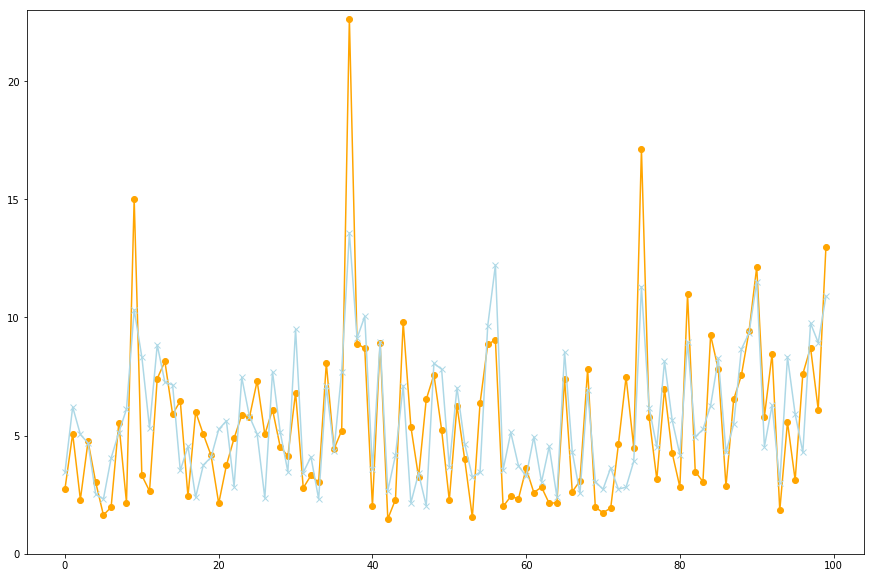

In [15]:
plt.figure(figsize=(15,10))
plt.ylim(0,23)
plt.plot(Y_valid.values[:100], color = 'orange', marker = 'o');
plt.plot(preds[:100], color = 'lightblue', marker = 'x');